# Initial EDA

In [1]:
import json
import os
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load CSV

In [3]:
CSV_NAME = 'big_song_list.csv'
data = pd.read_csv(CSV_NAME)

In [4]:
print(data.columns.values)

['track_id' 'title' 'album' 'genre' 'playlist_id' 'danceability' 'energy'
 'key' 'loudness' 'mode' 'speechiness' 'acousticness' 'instrumentalness'
 'liveness' 'valence' 'tempo' 'type' 'uri' 'track_href' 'analysis_url'
 'duration_ms' 'time_signature']


In [5]:
data.head()

,track_id,title,album,genre,playlist_id,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,03KizEd2nzRsbTOGwBIJYG,NEWGOTHB!TCH,NEWGOTHB!TCH,Dark Trap,19WuHd4MxWLzE1fpMmw4S4,0.700,0.958,0,-5.967,1,...,0.000036,0.1440,0.4680,172.133,audio_features,spotify:track:03KizEd2nzRsbTOGwBIJYG,https://api.spotify.com/v1/tracks/03KizEd2nzRs...,https://api.spotify.com/v1/audio-analysis/03Ki...,136214,4
1,04bEhujOxzNrXeideMtFuR,Never Satisfied,Never Satisfied,Dark Trap,19WuHd4MxWLzE1fpMmw4S4,0.561,0.964,1,-6.593,1,...,0.000004,0.8750,0.4520,160.088,audio_features,spotify:track:04bEhujOxzNrXeideMtFuR,https://api.spotify.com/v1/tracks/04bEhujOxzNr...,https://api.spotify.com/v1/audio-analysis/04bE...,119432,4
2,6o0xTt4eep4AL1Ta5yuVrY,Critical_Err0r,Critical_Err0r,Dark Trap,19WuHd4MxWLzE1fpMmw4S4,0.586,0.866,5,-12.560,0,...,0.000001,0.2320,0.6440,74.992,audio_features,spotify:track:6o0xTt4eep4AL1Ta5yuVrY,https://api.spotify.com/v1/tracks/6o0xTt4eep4A...,https://api.spotify.com/v1/audio-analysis/6o0x...,119999,4
3,5fUJHv7CNwb9lDmUJEfmQn,NO PAIN!,NO PAIN!,Dark Trap,19WuHd4MxWLzE1fpMmw4S4,0.392,0.774,9,-9.888,0,...,0.000000,0.7650,0.4400,94.951,audio_features,spotify:track:5fUJHv7CNwb9lDmUJEfmQn,https://api.spotify.com/v1/tracks/5fUJHv7CNwb9...,https://api.spotify.com/v1/audio-analysis/5fUJ...,132128,4
4,5otXzdvnXDUJ7ApMfdrFd1,King Of Macabre,The Gremlin,Dark Trap,19WuHd4MxWLzE1fpMmw4S4,0.646,0.880,8,-9.328,1,...,0.000008,0.0762,0.0437,113.033,audio_features,spotify:track:5otXzdvnXDUJ7ApMfdrFd1,https://api.spotify.com/v1/tracks/5otXzdvnXDUJ...,https://api.spotify.com/v1/audio-analysis/5otX...,169956,4


In [6]:
data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20046 entries, 0 to 20045
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          20046 non-null  object 
 1   title             20040 non-null  object 
 2   album             20040 non-null  object 
 3   genre             20046 non-null  object 
 4   playlist_id       20046 non-null  object 
 5   danceability      20046 non-null  float64
 6   energy            20046 non-null  float64
 7   key               20046 non-null  int64  
 8   loudness          20046 non-null  float64
 9   mode              20046 non-null  int64  
 10  speechiness       20046 non-null  float64
 11  acousticness      20046 non-null  float64
 12  instrumentalness  20046 non-null  float64
 13  liveness          20046 non-null  float64
 14  valence           20046 non-null  float64
 15  tempo             20046 non-null  float64
 16  type              20046 non-null  object

/var/folders/sd/w3lp1b4n2q74nsdy6g54xb0r0000gn/T/ipykernel_46499/2802456010.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  data.info(verbose=True, null_counts=True)


# 2. Plot counts

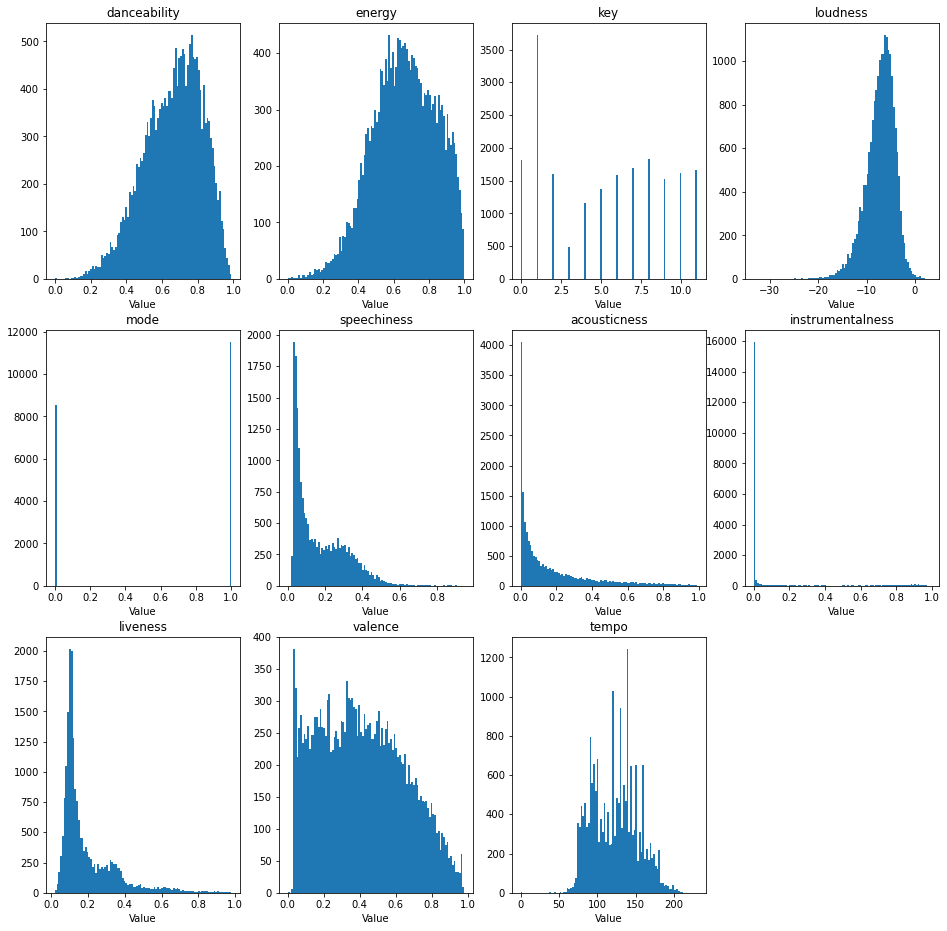

In [7]:
AUDIO_FEATURES = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

fig = plt.figure(figsize=(16, 16))
fig.tight_layout()

for idx, feature in enumerate(AUDIO_FEATURES):
  plt.subplot(3, 4, idx+1)
  plt.hist(data[feature], bins=100)
  plt.title(f"{feature}")
  plt.xlabel('Value')

plt.show()

# 3. Column by column info

In [8]:
for column in data.columns.values:
  print(column)
  print(f"Dype: {data[column].dtype}")
  print(f"Number null values: {data[column].isnull().sum()}")
  print(f"Unique value: {len(data[column].unique())}")
  print("------------------")

print(f"The null values are: \n {data[data.isnull().any(axis=1)]}")

track_id
Dype: object
Number null values: 0
Unique value: 20046
------------------
title
Dype: object
Number null values: 6
Unique value: 16839
------------------
album
Dype: object
Number null values: 6
Unique value: 11707
------------------
genre
Dype: object
Number null values: 0
Unique value: 8
------------------
playlist_id
Dype: object
Number null values: 0
Unique value: 39
------------------
danceability
Dype: float64
Number null values: 0
Unique value: 833
------------------
energy
Dype: float64
Number null values: 0
Unique value: 900
------------------
key
Dype: int64
Number null values: 0
Unique value: 12
------------------
loudness
Dype: float64
Number null values: 0
Unique value: 9036
------------------
mode
Dype: int64
Number null values: 0
Unique value: 2
------------------
speechiness
Dype: float64
Number null values: 0
Unique value: 1379
------------------
acousticness
Dype: float64
Number null values: 0
Unique value: 3428
------------------
instrumentalness
Dype: float

In [9]:
print(len(data['title'].unique()))
print(len(data['album'].unique()))

16839
11707


# 4. Seaborn heatmap

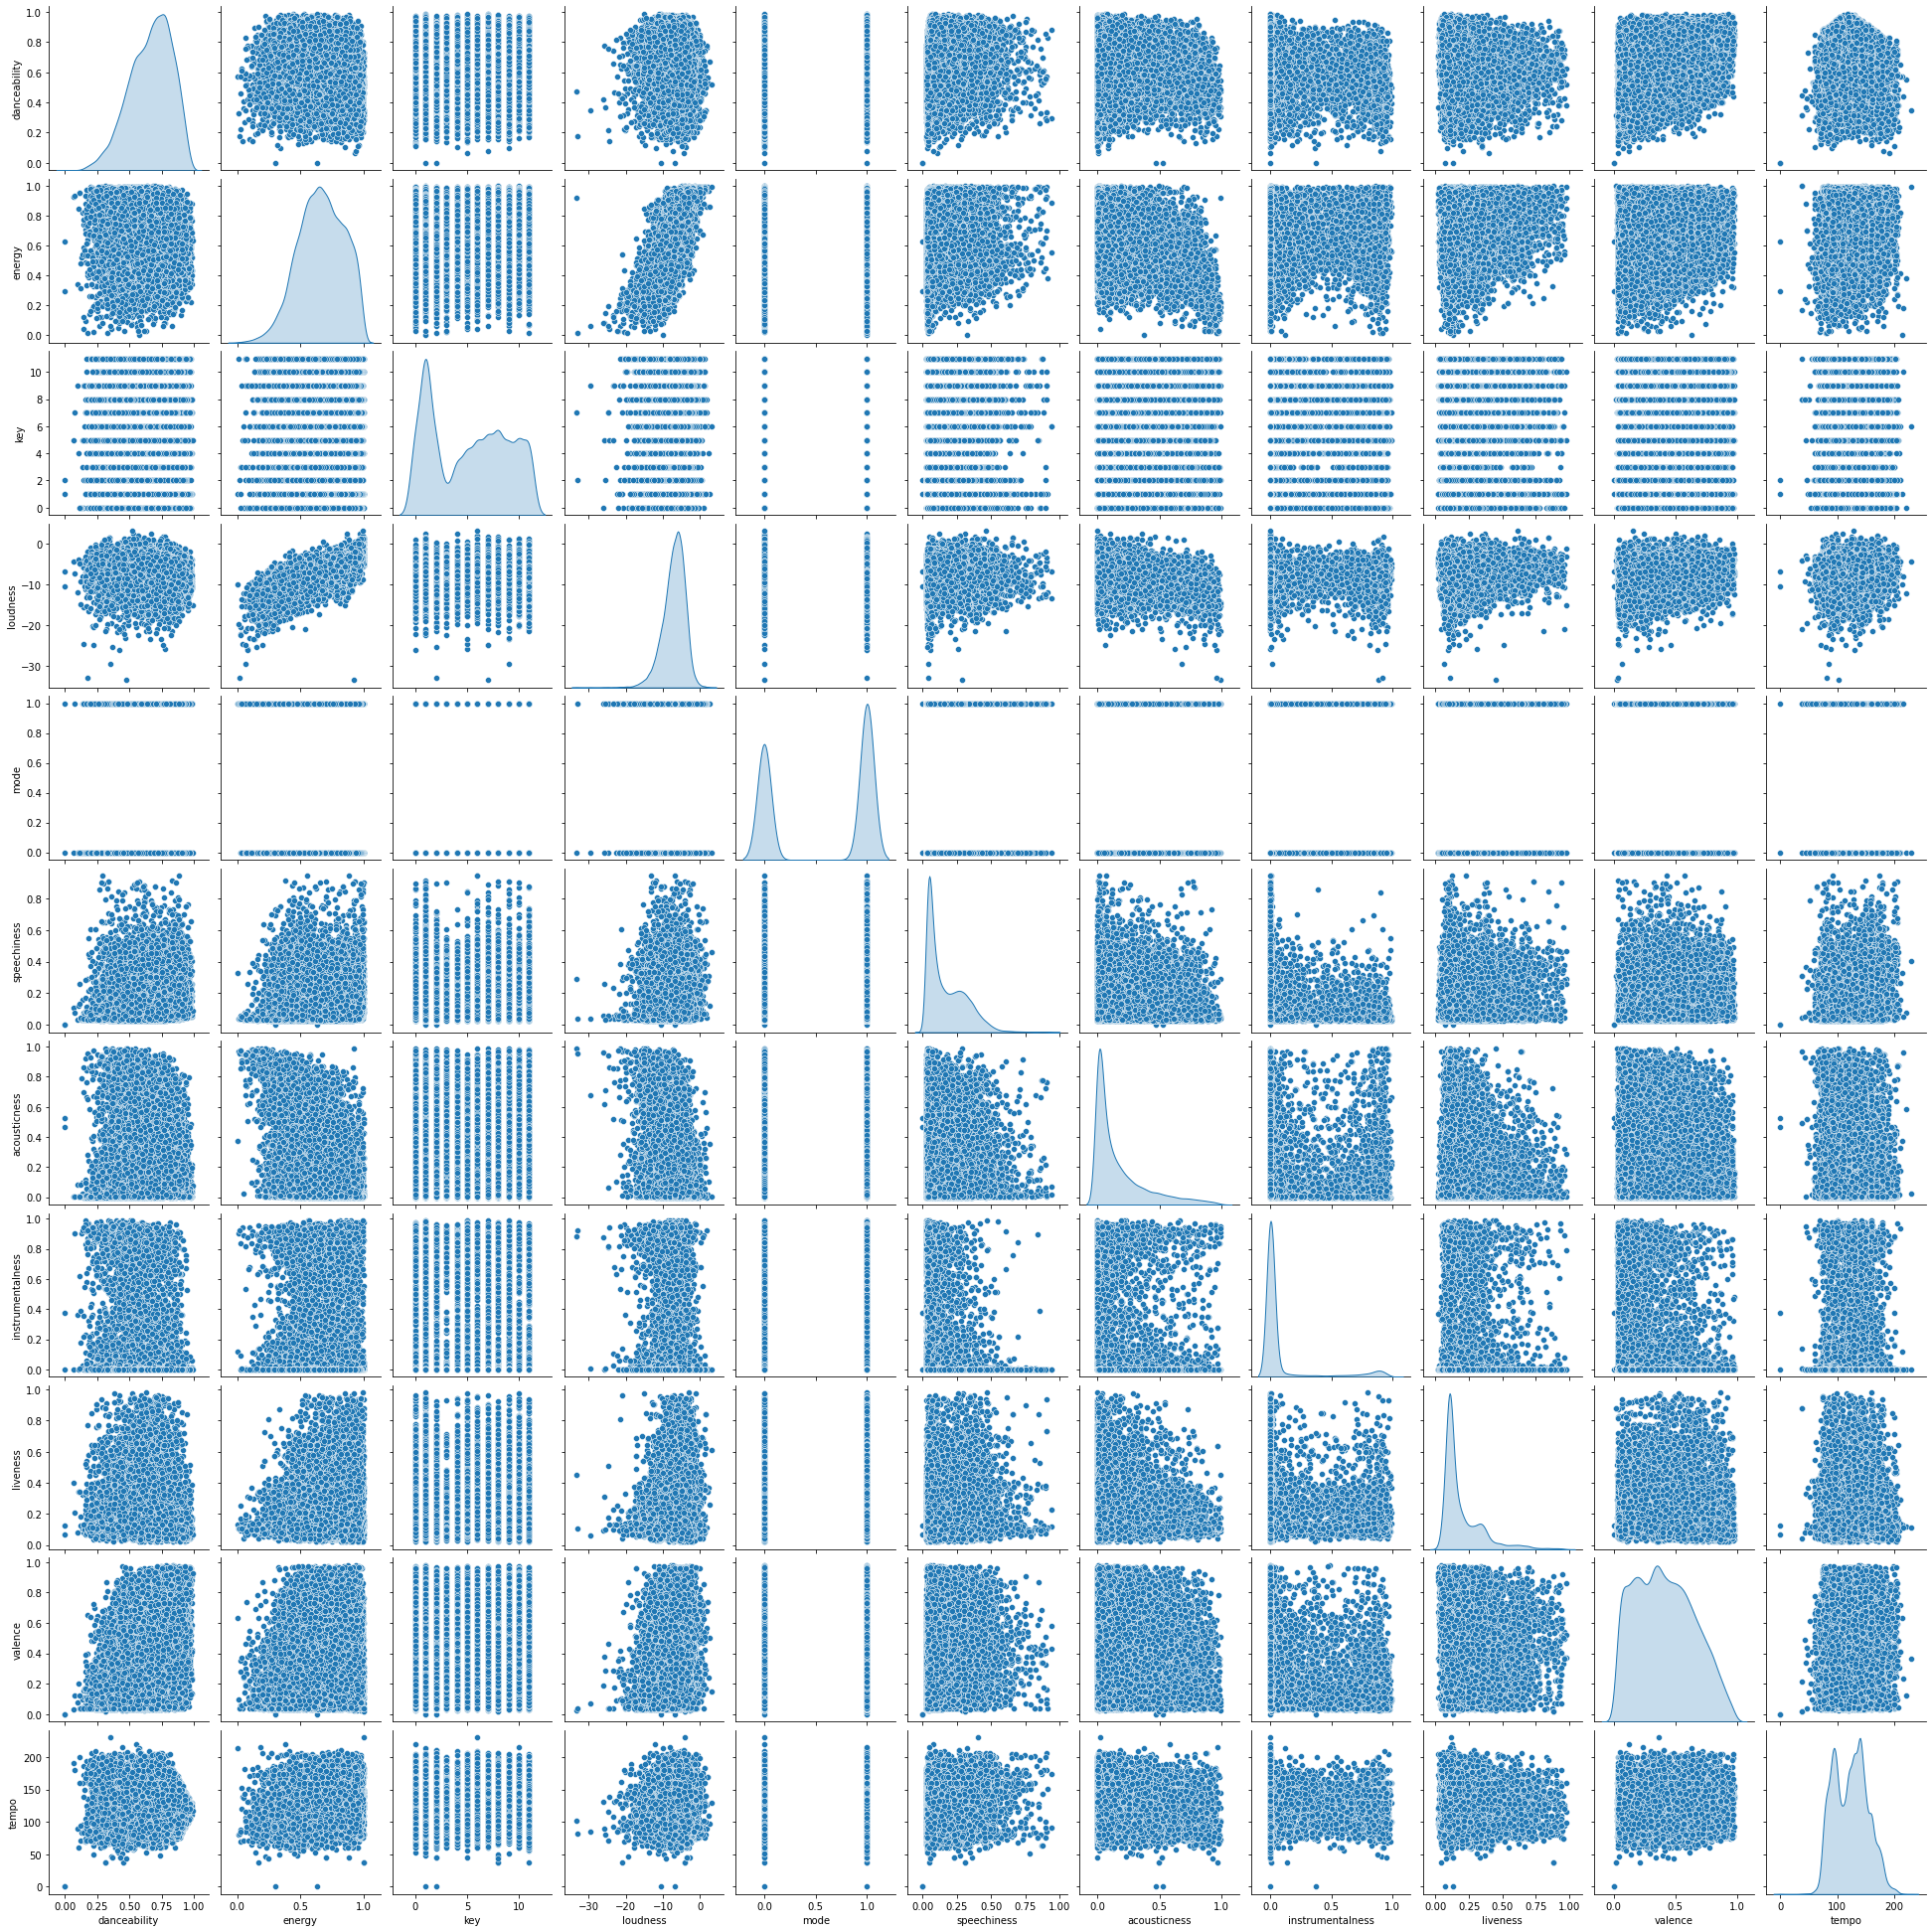

In [11]:
# PARIPLOT_FEATURES = AUDIO_FEATURES.append('genre')
sns.pairplot(data=data[AUDIO_FEATURES], diag_kind='kde')